# Anomalies for 2017-03-01

This day has unexpected flow. 
This looks like anomaly since there is no rainfall. But on the other hand there is a quite big gap in rainfall measurement in march. So maybe the problem is related to the rainfall data?

In [13]:
import datetime
import calendar
import time
import json
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

# Load project

In [18]:
PROJECT_FOLDER = '../../datasets/thorium-large/'

def load_series(fname, name):
    path = PROJECT_FOLDER + fname + '.csv'
    xs = pd.read_csv(path, parse_dates=['time'])
    xs = xs.set_index('time')[name].fillna(0)
    xs = xs.resample('5T').pad()
    xs = xs.rename(fname)
    return xs
    

flow1_raw = load_series('flow1', 'flow')
flow1_edited = load_series('flow1_edited', 'flow_edited')

flow2_raw = load_series('flow2', 'flow')
flow2_edited = load_series('flow2_edited', 'flow_edited')

flow3_raw = load_series('flow3', 'flow')
flow3_edited = load_series('flow3_edited', 'flow_edited')

flow4_raw = load_series('flow4', 'flow')
flow4_edited = load_series('flow4_edited', 'flow_edited')

flow5_raw = load_series('flow5', 'flow')
flow5_edited = load_series('flow5_edited', 'flow_edited')

rainfall = load_series('rainfall1', 'rainfall')

df = pd.concat(
    [flow1_raw, 
     flow1_edited,
     flow2_raw, 
     flow2_edited,
     flow3_raw, 
     flow3_edited,
     flow4_raw, 
     flow4_edited,
     flow5_raw, 
     flow5_edited,
     rainfall
    ], axis=1)
data_frame = df['2016-01-01':]
data_frame.head()

,flow1,flow1_edited,flow2,flow2_edited,flow3,flow3_edited,flow4,flow4_edited,flow5,flow5_edited,rainfall1
time,,,,,,,,,,,
2016-01-01 00:00:00,93.889999,93.889999,420.320007,420.320007,252.089996,252.089996,225.460007,225.460007,146.110001,146.110001,0.254
2016-01-01 00:05:00,93.480003,93.480003,416.660004,416.660004,251.850006,251.850006,225.470001,225.470001,145.320007,145.320007,0.254
2016-01-01 00:10:00,92.830002,92.830002,416.670013,416.670013,260.440002,260.440002,225.190002,225.190002,144.899994,144.899994,0.254
2016-01-01 00:15:00,92.199997,92.199997,415.059998,415.059998,255.789993,255.789993,225.229996,225.229996,140.699997,140.699997,0.254
2016-01-01 00:20:00,91.959999,91.959999,414.279999,414.279999,255.550003,255.550003,225.699997,225.699997,140.259995,140.259995,0.254


# Check first half of 2017

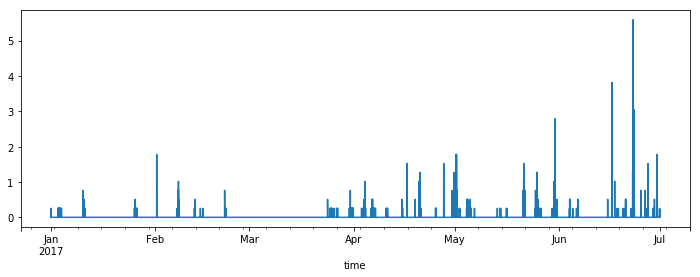

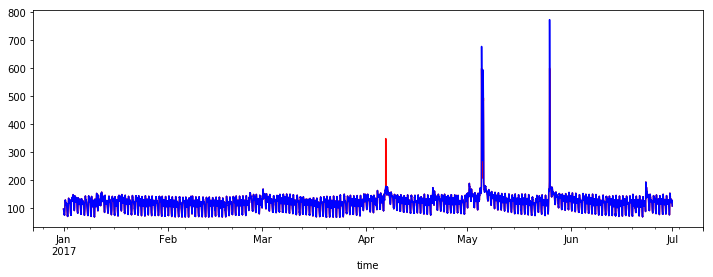

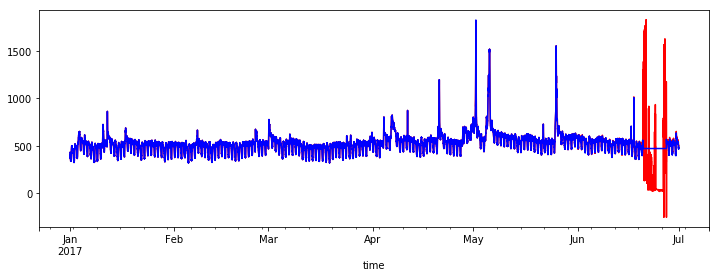

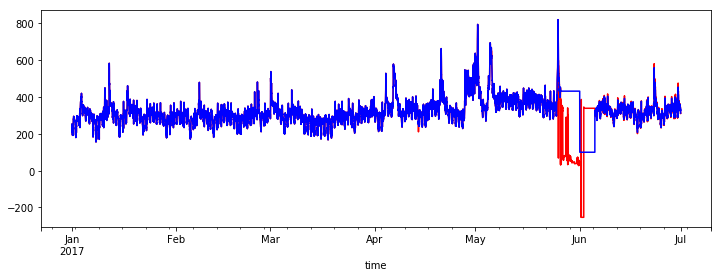

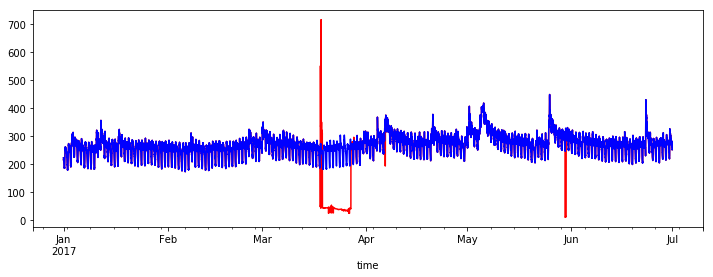

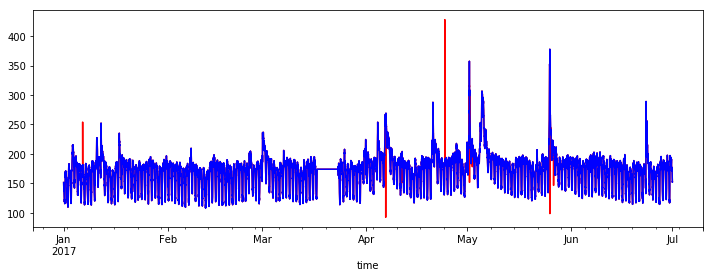

In [19]:
df = data_frame['2017-01-01': '2017-06-30']

df.rainfall1.plot()
plt.show()

df.flow1.plot(color='r')
df.flow1_edited.plot(color='b')
plt.show()

df.flow2.plot(color='r')
df.flow2_edited.plot(color='b')
plt.show()

df.flow3.plot(color='r')
df.flow3_edited.plot(color='b')
plt.show()

df.flow4.plot(color='r')
df.flow4_edited.plot(color='b')
plt.show()

df.flow5.plot(color='r')
df.flow5_edited.plot(color='b')
plt.show()

# 2017-03-01

We have different base flow on this day, but there is no rain.

And it looks that it was not marked as anomaly

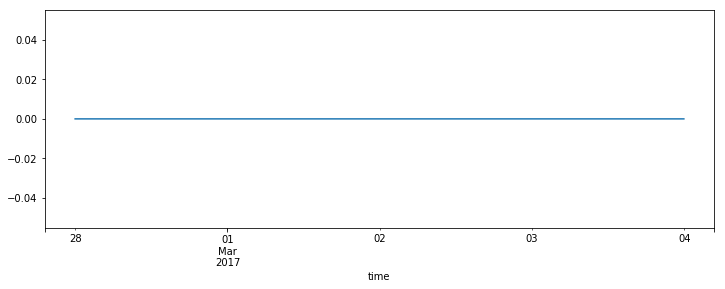

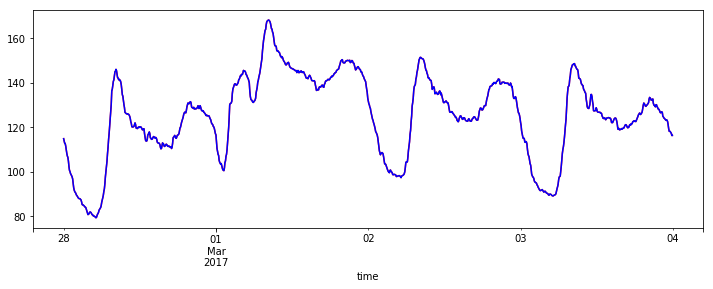

In [3]:
df = data_frame['2017-02-28': '2017-03-03']
df.rainfall1.plot()
plt.show()
df.flow1.plot(color='r')
df.flow1_edited.plot(color='b')
plt.show()

### Compare this day flow to other days

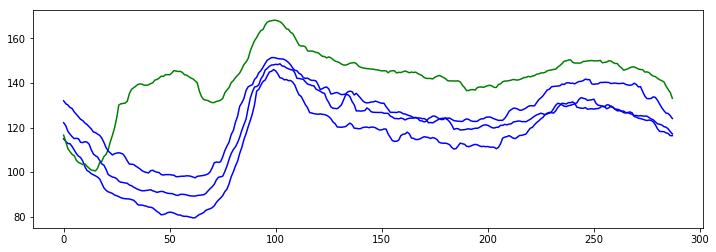

In [10]:
df = data_frame['2017-02-28':'2017-02-28'].reset_index()
df.flow1_edited.plot(color='b')
df = data_frame['2017-03-01':'2017-03-01'].reset_index()
df.flow1_edited.plot(color='g')
df = data_frame['2017-03-02':'2017-03-02'].reset_index()
df.flow1_edited.plot(color='b')
df = data_frame['2017-03-03':'2017-03-03'].reset_index()
df.flow1_edited.plot(color='b')
plt.show()

## How other flow looks like in on this day?

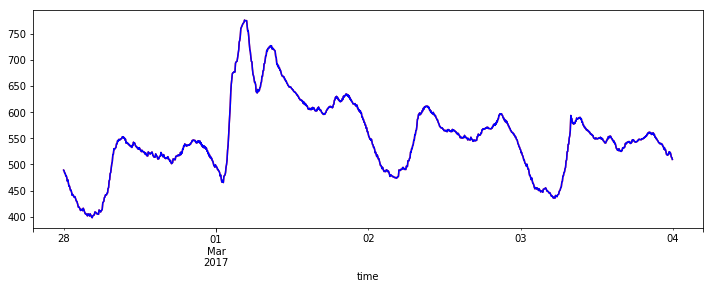

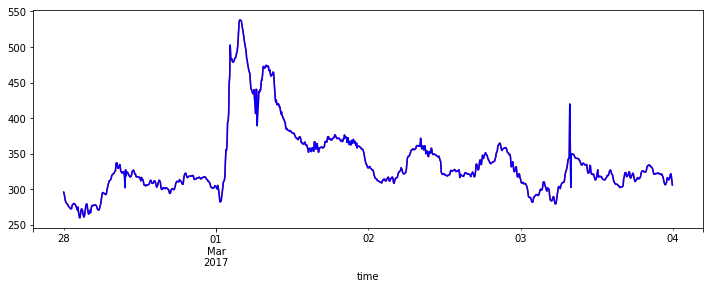

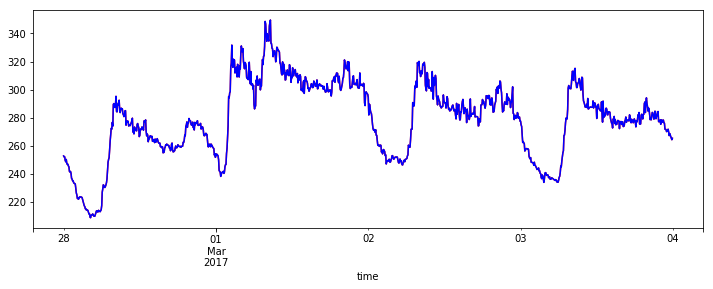

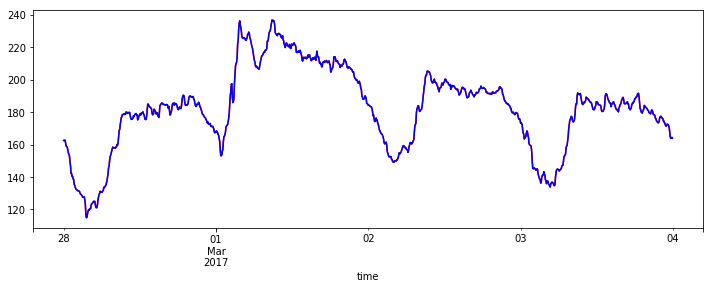

In [12]:
df = data_frame['2017-02-28': '2017-03-03']

df.flow2.plot(color='r')
df.flow2_edited.plot(color='b')
plt.show()

df.flow3.plot(color='r')
df.flow3_edited.plot(color='b')
plt.show()

df.flow4.plot(color='r')
df.flow4_edited.plot(color='b')
plt.show()

df.flow5.plot(color='r')
df.flow5_edited.plot(color='b')
plt.show()